# Chap3 from the book: 'L'apprentissage profond avec Pyhton', François CHOLLET

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras import layers
from keras import models
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical

In [80]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10_000)

In [81]:
train_data.shape, test_data.shape

((8982,), (2246,))

# Data processing

In [82]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [83]:
def vectorize_sequences(sequences, dimension=10_000):
    result = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        result[i, sequence] = 1
    return result

In [85]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
x_train.shape

(8982, 10000)

In [86]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [46]:
# validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = train_labels[:1000]
partial_y_train = train_labels[1000:]

# Model

In [68]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu' ,input_shape=(10_000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 64)                640064    
                                                                 
 dense_15 (Dense)            (None, 128)               8320      
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dense_17 (Dense)            (None, 46)                2990      
                                                                 
Total params: 659,630
Trainable params: 659,630
Non-trainable params: 0
_________________________________________________________________


In [69]:
model.compile(
    optimizer="rmsprop",
    loss='categorical_crossentropy',
    metrics=['acc']
)

In [70]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20
16/16 [==============================] - 3s 165ms/step - loss: 2.5990 - acc: 0.4263 - val_loss: 1.6345 - val_acc: 0.6620
Epoch 2/20
16/16 [==============================] - 0s 13ms/step - loss: 1.3837 - acc: 0.6994 - val_loss: 1.2766 - val_acc: 0.7110
Epoch 3/20
16/16 [==============================] - 0s 12ms/step - loss: 1.0602 - acc: 0.7539 - val_loss: 1.1257 - val_acc: 0.7370
Epoch 4/20
16/16 [==============================] - 0s 12ms/step - loss: 0.8517 - acc: 0.7963 - val_loss: 1.0277 - val_acc: 0.7690
Epoch 5/20
16/16 [==============================] - 0s 12ms/step - loss: 0.6694 - acc: 0.8443 - val_loss: 0.9711 - val_acc: 0.7920
Epoch 6/20
16/16 [==============================] - 0s 12ms/step - loss: 0.5268 - acc: 0.8780 - val_loss: 0.9620 - val_acc: 0.8000
Epoch 7/20
16/16 [==============================] - 2s 153ms/step - loss: 0.4197 - acc: 0.9049 - val_loss: 0.9780 - val_acc: 0.8010
Epoch 8/20
16/16 [==============================] - 0s 12ms/step - loss: 0.3356 -

In [72]:
model.evaluate(x_test, test_labels)
# [1.2138543128967285, 0.7867319583892822]
# [1.420853614807129, 0.7662510871887207]
# [1.3885809183120728, 0.7756010890007019]
#

71/71 [==============================] - 0s 2ms/step - loss: 1.3886 - acc: 0.7756


[1.3885809183120728, 0.7756010890007019]

# Display performances curves

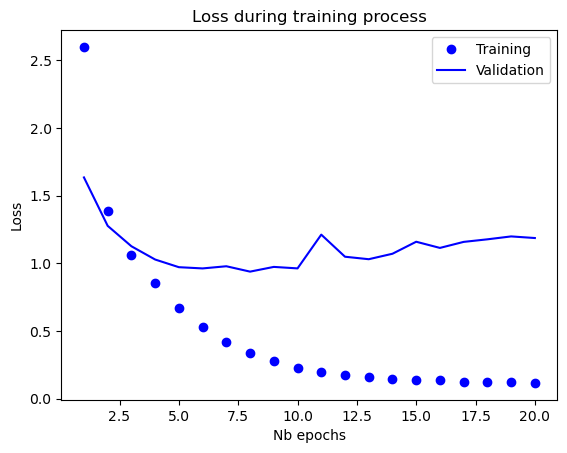

In [73]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, 21)

plt.plot(epochs, loss_values, 'bo', label="Training")
plt.plot(epochs, val_loss_values, 'b', label="Validation")

plt.title("Loss during training process")
plt.xlabel("Nb epochs")
plt.ylabel("Loss")
plt.legend()

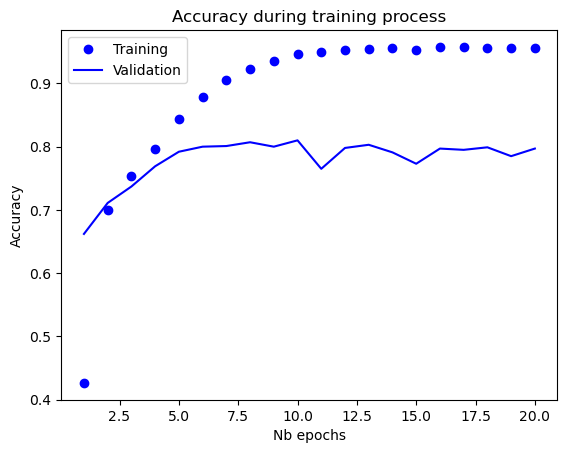

In [74]:
history_dict = history.history
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs = range(1, 21)

plt.plot(epochs, acc_values, 'bo', label="Training")
plt.plot(epochs, val_acc_values, 'b', label="Validation")

plt.title("Accuracy during training process")
plt.xlabel("Nb epochs")
plt.ylabel("Accuracy")
plt.legend()